In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd 
import math

In [2]:
plt.rcParams["figure.figsize"] = (6,6)

In [3]:
data = pd.read_csv("Data.csv")

In [4]:
data.head(10)

,Dist,No_sample,T_4,T_5,T_6
0,0.0,0.00,NaN,NaN,NaN
1,0.1,0.06,NaN,NaN,NaN
2,0.2,0.25,NaN,NaN,NaN
3,0.3,0.55,NaN,NaN,NaN
4,0.4,0.94,3.26,NaN,NaN
5,0.5,1.40,3.61,3.19,NaN
6,0.6,1.90,3.86,2.75,1.10
7,0.7,2.40,3.98,2.26,0.68
8,0.8,2.88,3.98,1.76,0.35
9,0.9,3.30,3.86,1.27,0.12


In [5]:
#setting Distance as the x axis 
x=data["Dist"]

In [6]:
t0=data["No_sample"]
t4=data["T_4"]
t5=data["T_5"]
t6=data["T_6"]

Text(0, 0.5, 'Voltage')

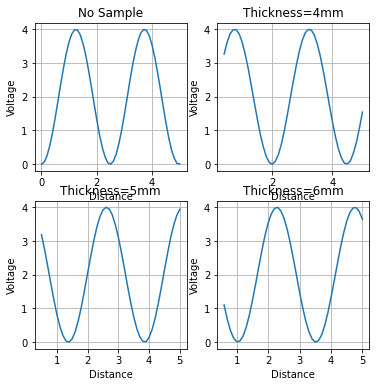

In [7]:
#First_plot
plt.subplot(2, 2, 1)

plt.plot(x,t0)
plt.grid(True)
plt.title("No Sample")
plt.xlabel("Distance")
plt.ylabel("Voltage")

#second Plot
plt.subplot(2,2,2)

plt.plot(x,t4)
plt.grid(True)
plt.title("Thickness=4mm")
plt.xlabel("Distance")
plt.ylabel("Voltage")

#3rd plot
plt.subplot(2,2,3)

plt.plot(x,t5)
plt.grid(True)
plt.title("Thickness=5mm")
plt.xlabel("Distance")
plt.ylabel("Voltage")

#4thplot
plt.subplot(2,2,4)

plt.plot(x,t6)
plt.grid(True)
plt.title("Thickness=6mm")
plt.xlabel("Distance")
plt.ylabel("Voltage")

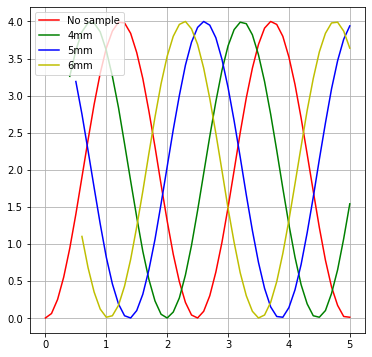

In [8]:
plt.plot(x,t0,'r',label="No sample")
plt.plot(x,t4,'g',label="4mm")
plt.plot(x,t5,'b',label="5mm")
plt.plot(x,t6,'y',label="6mm")
plt.grid(True)
plt.legend(loc="upper left")

plt.show()


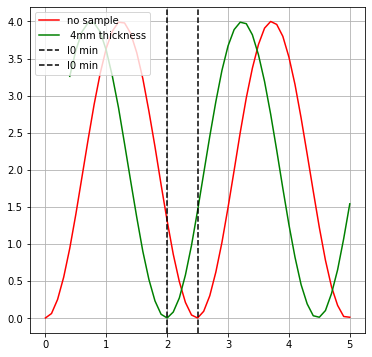

In [9]:
#Finding the shifts 

plt.plot(x,t0,'r',label="no sample")
plt.plot(x,t4,'g',label=" 4mm thickness")
plt.axvline(x=x[25],c='k',ls='--',label="I0 min")
plt.axvline(x=x[20],c='k',ls='--',label="I0 min")
plt.grid(True)
plt.legend(loc="upper left")


In [10]:
#minimum value with no sample 
t0[25] #minimum value is stored at the 25th location in the array
#To calculate the distance at the minimum with no sample
d0=x[25]
print ("The distance of minimum value without the sample =  " , d0)


The distance of minimum value without the sample =   2.5


In [11]:
#minimum value with t=4mm
t4[20] #Min value is stored at the 20th location in the array
d4=x[20] 
print("Distance of minimum value is  ",d4)
#shift 1
x1 = abs(d4-d0) 
#x1=0.3
print("the shift in minimum value is ", x1)

Distance of minimum value is   2.0
the shift in minimum value is  0.5


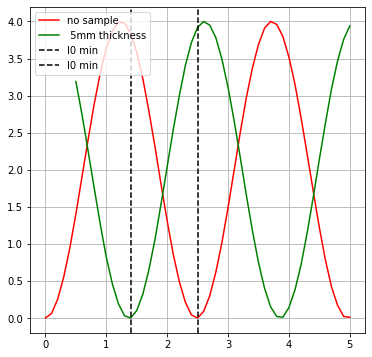

In [12]:
#similarly for 5mm thickness
plt.plot(x,t0,'r',label="no sample")
plt.plot(x,t5,'g',label=" 5mm thickness")
plt.axvline(x=x[25],c='k',ls='--',label="I0 min")
plt.axvline(x=x[14],c='k',ls='--',label="I0 min")
plt.grid(True)
plt.legend(loc="upper left")

In [13]:
#minimum value with t=5mm
#t5[14] #Min value is stored at the 14th location in the array
d5 = x[14]
print("Distance of minimum value(in cm) is  ",d5)
#shift 1
x2 = abs(d5-d0) 
#x2 = 0.5
print("the shift in minimum value (in cm) is ", x2)

Distance of minimum value(in cm) is   1.4
the shift in minimum value (in cm) is  1.1


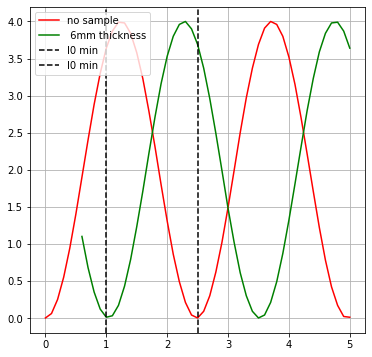

In [14]:
#6mm sample
plt.plot(x,t0,'r',label="no sample")
plt.plot(x,t6,'g',label=" 6mm thickness")
plt.axvline(x=x[25],c='k',ls='--',label="I0 min")
plt.axvline(x=x[10],c='k',ls='--',label="I0 min")
plt.grid(True)
plt.legend(loc="upper left")

In [15]:
#minimum value with t=6mm
#t6[10] #Min value is stored at the 10th location in the array
d6 = x[10]
print("Distance of minimum value(in cm) is  ",d6)
#shift 1
x3 = abs(d6-d0) 
#x3 = 1
print("the shift in minimum value (in cm) is ", x3)

Distance of minimum value(in cm) is   1.0
the shift in minimum value (in cm) is  1.5


In [16]:
#The shift in Values for 4mm, 5mm, 6mm are
print("the shift in the minimum for 4mm, 5mm, and 6mm are ", x1,"cm", x2,"cm", x3,"cm respectively")

the shift in the minimum for 4mm, 5mm, and 6mm are  0.5 cm 1.1 cm 1.5 cm respectively


In [17]:
#thickness in mm
t4=4 
t5=5
t6=6

In [18]:
# k = (tmm + xcm)
k4 = t4*10**(-3) + 0.5*10**(-2)
k5 = t5*10**(-3) + 1.1*10**(-2)
k6 = t6*10**(-3) + 1.5*10**(-2)
print(k4,k5,k6)

0.009000000000000001 0.016 0.020999999999999998


In [19]:
#Constants
m=1
n=0
a= 2.25*10**(-2)
b= 1.125*10**(-2)
nu= 9 * 10**9 #frequency
c= 3 * 10**8
beta = 2*np.pi*nu/c
beta

188.4955592153876

$\beta_{c}= \sqrt{{(\frac{m\pi}{a}})^{2}+{(\frac{n\pi}{b}})^{2}}$

In [20]:
betac = np.pi/a
betac

139.62634015954637

$\beta_{g0}= \sqrt{{\beta}^{2}-{\beta_{c}}^{2}}$

In [21]:
betago = np.sqrt(beta**2 - betac**2)
betago

126.62962124863338

$s_{i} = \beta_{g0} * t $ 

$ z_{i} = \beta_{g0}(x+t) $

In [22]:
s4 = betago*t4*10**(-2)
s5 = betago*t5*10**(-2)
s6 = betago*t6*10**(-2)

z4 = betago*k4
z5 = betago*k5
z6 = betago*k6

To solve

$ \frac{Tan(X)}{X} = \frac{Tan(\beta_{g0}(t+x)}{\beta_{g0}t} $

In [30]:
sl4 = (math.tan(z4))/s4
sl5 = (math.tan(z5))/s5
sl6 = (math.tan(z6))/s6 
print ("Tan(X)/X = ", sl4, sl5, sl6)

Tan(X)/X =  0.4291974866716183 -0.3226043741260883 -0.06891853770778276


From the table the values of X are <br>
4.027 <br>
5.246 <br>
5.897 <br>
respectively 


In [24]:
X4 = 4.207
X5 = 5.246
X6 = 5.897

$\beta_{gs} = \frac{X}{t}$ <br>
${\beta_{os}}^2 = {\beta_{gs}}^{2} +{\beta_{c}}^{2} $

In [25]:
betags4 =  ( X4 )/(t4*10**(-3)) 
betags5 =  ( X5 )/(t5*10**(-3)) 
betags6 =  ( X6 )/(t6*10**(-3)) 
betags4, betags5, betags6

(1051.75, 1049.2, 982.8333333333334)

In [26]:
betaos4 = math.sqrt(((betags4)**2) +((betac)**2))
betaos5 = math.sqrt(((betags5)**2) + ((betac)**2))
betaos6 = math.sqrt(((betags6)**2) + ((betac)**2))
betaos4, betaos5, betaos6

(1060.9776516809152, 1058.449883020613, 992.7018061721559)

$ \varepsilon = \frac{{\beta_{0s}}^{2}}{{\beta_{o}}^{2}}$

In [27]:
ep4= betaos4**2 /(10* beta**2)
ep4

3.1681827570461993

In [28]:
ep5 = betaos5**2 /(10* beta**2)
ep5

3.1531044129080863

In [29]:
ep6 = betaos6**2 /(10* beta**2)
ep6

2.7735460306254653

Average Dielectic constant of the material used is 

In [31]:
(ep4+ep5+ep6)/3

3.0316110668599165